In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

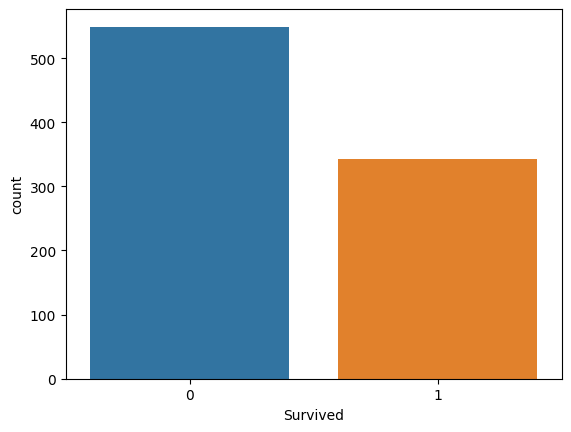

In [15]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

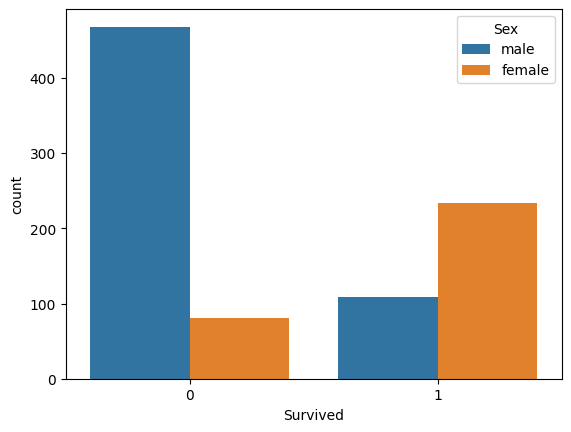

In [16]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

In [17]:
train['Pclass'].unique()

array([3, 1, 2])

<Axes: xlabel='Survived', ylabel='count'>

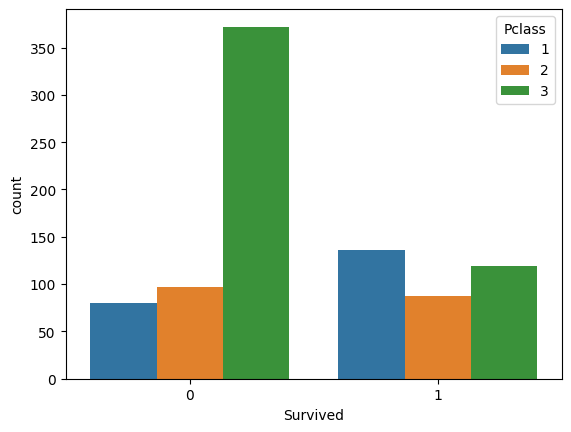

In [18]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

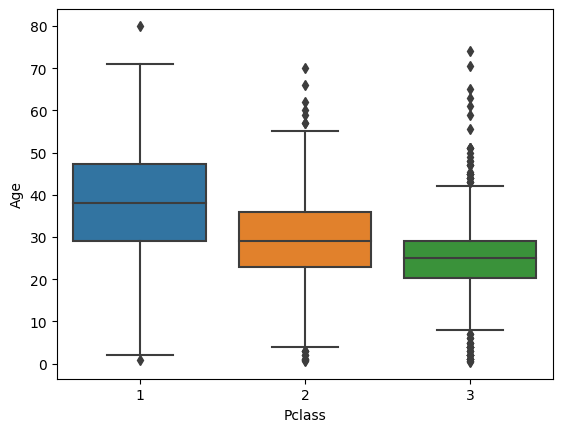

In [27]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
test.shape

(418, 11)

In [23]:
def add_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    return int(train[train['Pclass'] == Pclass]['Age'].mean())
  else:
    return Age

In [25]:
train['Age'] = train[['Age', 'Pclass']].apply(add_age, axis = 1)
test['Age'] = test[['Age', 'Pclass']].apply(add_age, axis = 1)

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
train.drop(columns = 'Cabin', inplace = True)
test.drop(columns = 'Cabin', inplace = True)

In [30]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

In [31]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [32]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
def combine(df, col1, col2):
  df['Family'] = df[col1] + df[col2]
  df.drop(columns = [col1, col2], inplace = True)
  return df

In [35]:
train = combine(train, 'SibSp', 'Parch')
test = combine(test, 'SibSp', 'Parch')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


<Axes: >

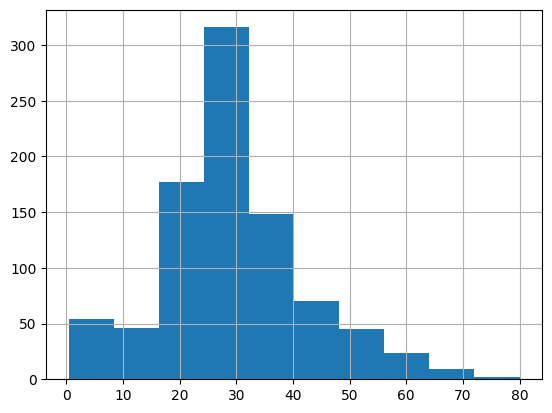

In [37]:
train['Age'].hist()

In [44]:
cut_points = [0, 5, 12, 18, 35, 60, 100]

label_names = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

def process_age(df, cut_points, label_names):
  df['Age'] = df['Age'].fillna(-0.5)
  df['Age_categories'] = pd.cut(df['Age'], cut_points, labels = label_names)
  return df

In [45]:
train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Young Adult


In [47]:
def create_dummies(df, column_name):
  dummies = pd.get_dummies(df[column_name], prefix = column_name)
  df = pd.concat([df, dummies], axis = 1)
  return df

In [48]:
for column in ['Pclass', 'Sex', 'Age', 'Age_categories', 'Embarked']:
  train = create_dummies(train, column)
  test = create_dummies(test, column)

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family',
       ...
       'Age_80.0', 'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object', length=113)

In [54]:
train.drop(columns = ['Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Embarked', 'Age_categories'], inplace = True)
test.drop(columns = ['Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Embarked', 'Age_categories'], inplace = True)

In [55]:
### Logistic Regression

In [56]:
X = train.drop(columns = ['Survived'])
y = train['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [60]:
lr = LogisticRegression()

scores = cross_val_score(lr, X, y, cv = 10)

scores.sort()

accuracy = scores.mean()

print(scores)
print(accuracy)

[0.78651685 0.79775281 0.80898876 0.80898876 0.80898876 0.81111111
 0.82022472 0.82022472 0.83146067 0.86516854]
0.8159425717852684
